### Lab Problems Week 6: Volatility Models

#### Thomas Tao Yang and Jianhua Mei

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
from arch import arch_model
from scipy.optimize import minimize

# R Package
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import ListVector

### 1. Consider the daily share prices of the Commonwealth Bank (CWB) for the period September 5, 1996 - August 30, 2006 in the data file cwb.csv. Let $y_{t}$ denote the time series of the share prices.

In [18]:
CWB_prices = pd.read_csv('cwb.csv')
y = CWB_prices['y'].dropna()

### a) Draw the time series plot of $\{y_t\}$ and compute the Autocorrelation Functions (ACF) and Partial Autocorrelation Functions (PACF). Does $\{y_t\}$   appear to be stationary? Explain your answer.

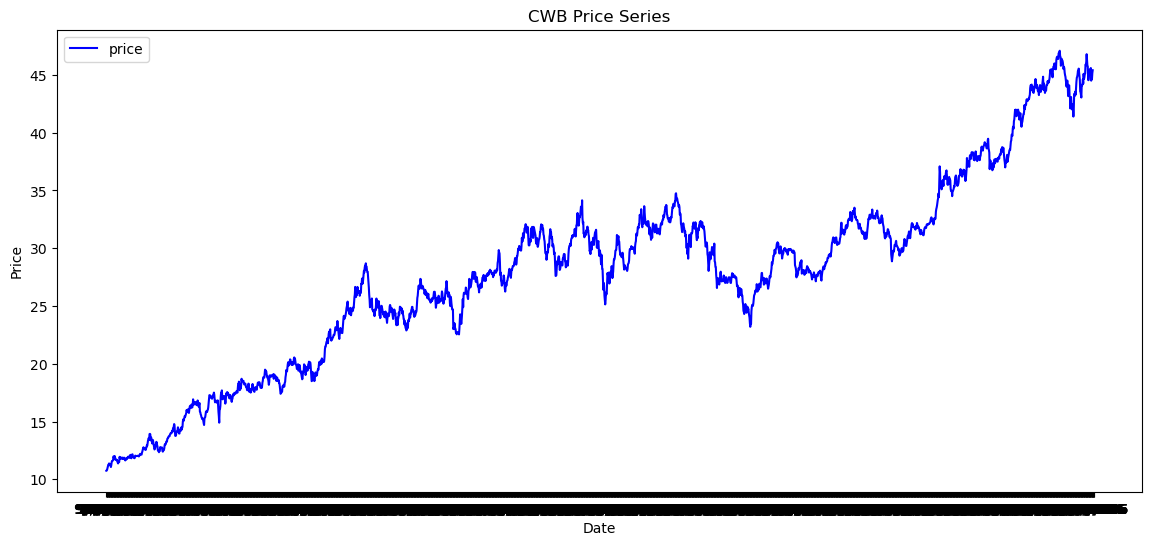

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(CWB_prices.date, CWB_prices.y, label='price', color='blue')

plt.title('CWB Price Series')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()

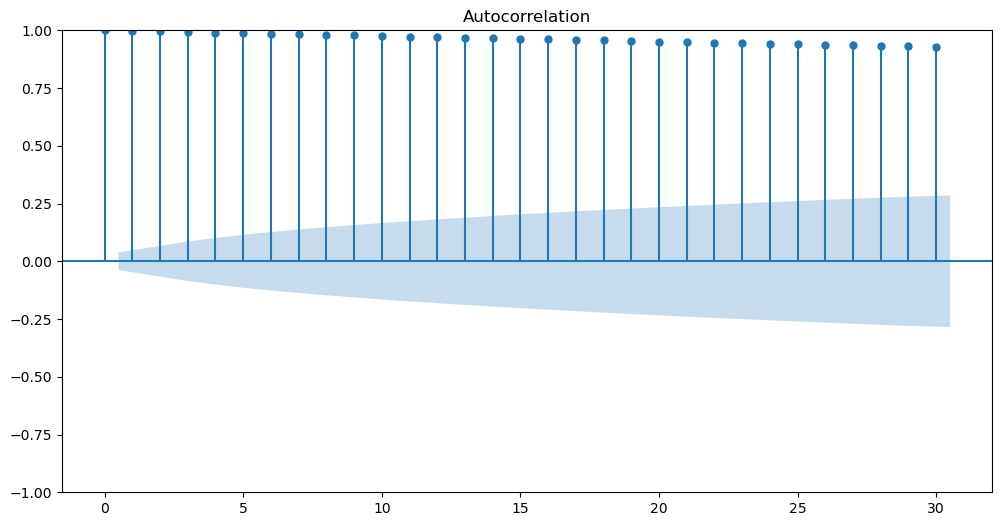

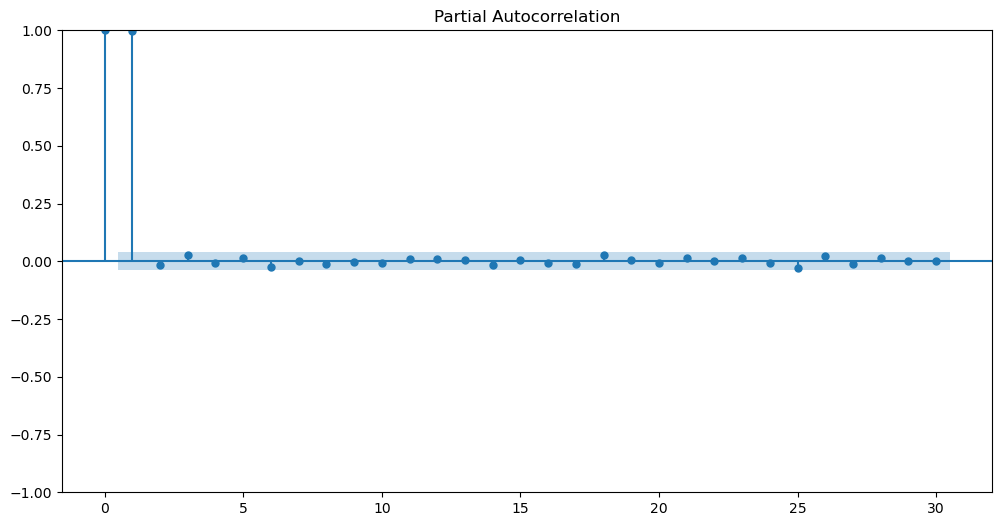

In [20]:

# ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=30, ax=ax)
plt.show()

# PACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(y.values.squeeze(), lags=30, ax=ax, method = 'yw')
plt.show()


#### $\{y_t\}$ has an apparent upward trend, the ACF $\rho_k ≈ 1$ even for large k, and the PACF $\phi_{11} ≈ 1$. All are evidence against the stationarity of $\{y_t\}$. It is very likely that $\{y_t\}$ has unitroot. 

### (b) Identify (select) and estimate an appropriate model (e.g., ARMA(p, q)) for the expectation of the log return $r_{t} = log(y_t/y_{t−1})$ .Report the estimated model.

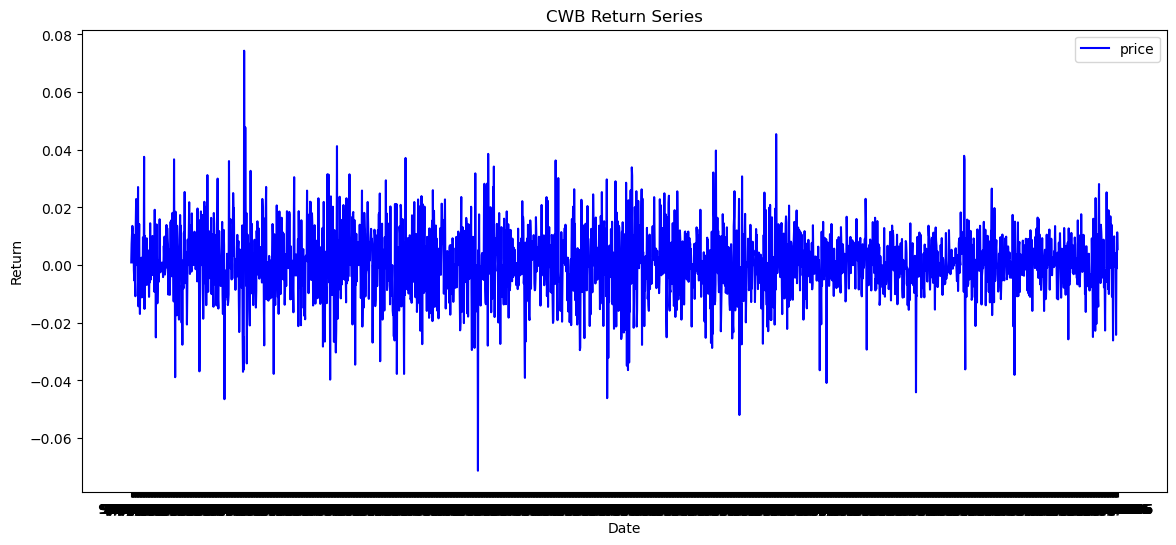

In [21]:
# Log Return
CWB_prices['RET'] = np.log(CWB_prices['y']).diff() 

CWB_prices = CWB_prices.dropna()  

plt.figure(figsize=(14, 6))
plt.plot(CWB_prices.date, CWB_prices.RET, label='price', color='blue')

plt.title('CWB Return Series')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend()


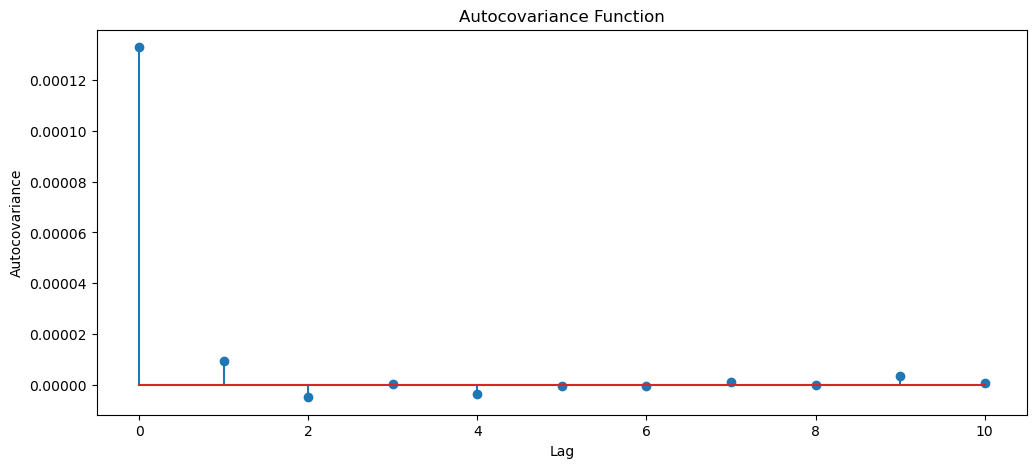

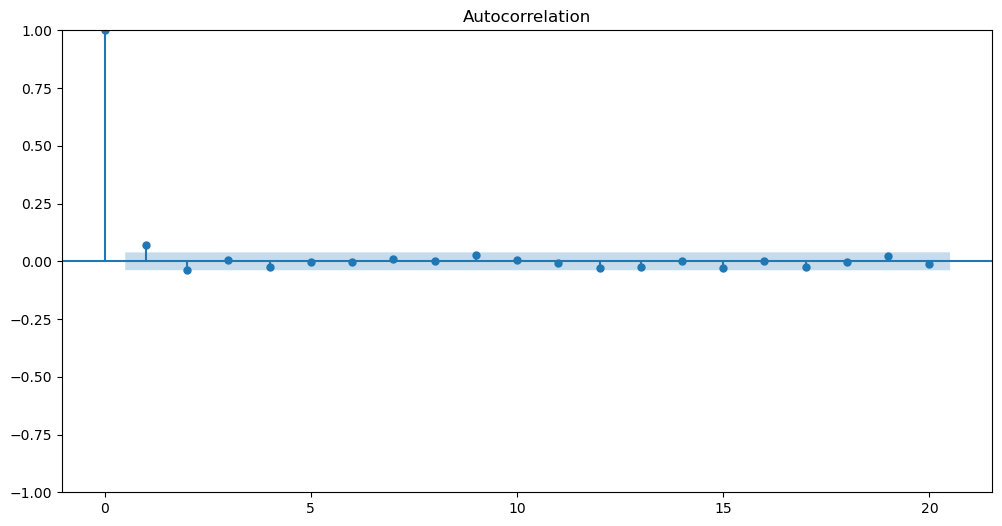

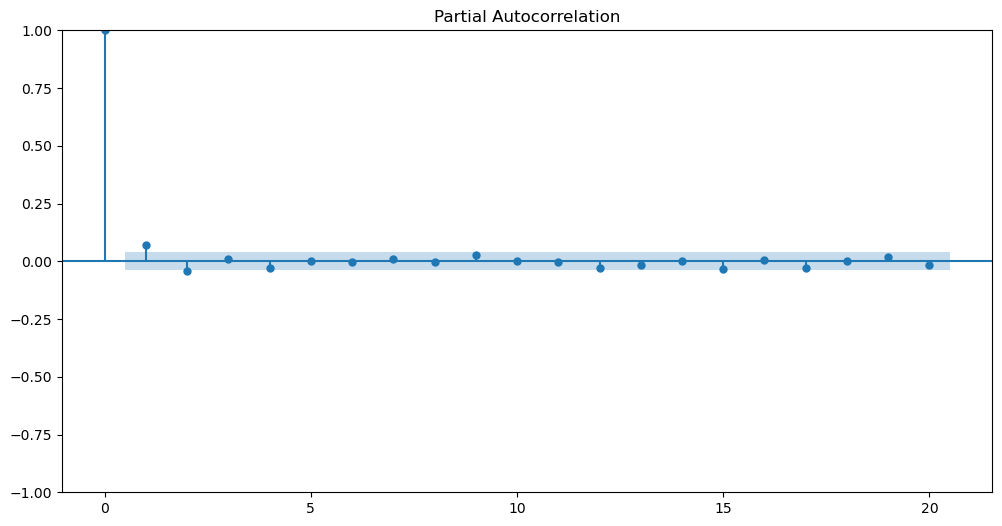

In [22]:
#
ts = CWB_prices['RET'].reset_index(drop = True)

#Plot Autocovariance Functions
autocov = st.acovf(ts, nlag = 10)  

plt.figure(figsize=(12,5))
plt.stem(autocov)
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.title('Autocovariance Function')
plt.show()

#
# ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=20, ax=ax)
plt.show()
# PACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(ts.values.squeeze(), lags=20, ax=ax, method = 'yw')
plt.show()

In [23]:
#%% ARMA(1,0) Model
p = 1
q = 0
model1 =  sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()        

print('ARMA(1,0) Model aic:', model1.aic) 
print('ARMA(1,0) Model bic:', model1.bic)
print(model1.summary())

ARMA(1,0) Model aic: -15859.801977761765
ARMA(1,0) Model bic: -15842.20756575178
                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 2604
Model:                 ARIMA(1, 0, 0)   Log Likelihood                7932.901
Date:                  周二, 29 8月 2023   AIC                         -15859.802
Time:                        13:44:56   BIC                         -15842.208
Sample:                             0   HQIC                        -15853.428
                               - 2604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.269      0.023    7.53e-05       0.001
ar.L1          0.0701      0.016      4.275      0

In [24]:
#%% ARMA(0,1) Model
p = 0
q = 1

model2 = sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()          

print('ARMA(0,1) Model aic:', model2.aic) 
print('ARMA(0,1) Model bic:', model2.bic)
print(model2.summary())

ARMA(0,1) Model aic: -15860.88363792825
ARMA(0,1) Model bic: -15843.289225918264
                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 2604
Model:                 ARIMA(0, 0, 1)   Log Likelihood                7933.442
Date:                  周二, 29 8月 2023   AIC                         -15860.884
Time:                        13:45:11   BIC                         -15843.289
Sample:                             0   HQIC                        -15854.509
                               - 2604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.274      0.023    7.62e-05       0.001
ma.L1          0.0732      0.016      4.441      0

In [25]:
#%% ARMA(1,1) Model
p = 1
q = 1

model3 = sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()          

print('ARMA(1,1) Model aic:', model3.aic) 
print('ARMA(1,1) Model bic:', model3.bic)
print(model3.summary())

ARMA(1,1) Model aic: -15863.390299951616
ARMA(1,1) Model bic: -15839.931083938302
                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 2604
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7935.695
Date:                  周二, 29 8月 2023   AIC                         -15863.390
Time:                        13:45:11   BIC                         -15839.931
Sample:                             0   HQIC                        -15854.891
                               - 2604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.321      0.020    8.58e-05       0.001
ar.L1         -0.4240      0.168     -2.529      

In [26]:
#%% ARMA(1,2) Model
p = 1
q = 2

model4 = sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()          

print('ARMA(1,2) Model aic:', model4.aic) 
print('ARMA(1,2) Model bic:', model4.bic)
print(model4.summary())

ARMA(1,2) Model aic: -15860.944501936021
ARMA(1,2) Model bic: -15831.620481919379
                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 2604
Model:                 ARIMA(1, 0, 2)   Log Likelihood                7935.472
Date:                  周二, 29 8月 2023   AIC                         -15860.945
Time:                        13:45:12   BIC                         -15831.620
Sample:                             0   HQIC                        -15850.321
                               - 2604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.341      0.019    8.97e-05       0.001
ar.L1         -0.1039      0.381     -0.273      

#### First, we perform the ADF tests to $r_{t} = log(y_{t}/y_{t−1}$). The test results show that there are no unit roots in the log return process. Then, we compare four candidate models: ARMA(1, 0), ARMA(0, 1), ARMA(1, 1), and ARMA(1, 2). We prefer to work with ARMA(1, 1) as it has the smallest aic and all significant AR and MA coefficients.  In this case, we focus more on the significance of model coefficients to select the most suitable model. 

### d) Test if the errors in your chosen model contain ARCH or GARCH effects. 
### Let $\{e_{t}^{2}\}$ denote the sequence of the squared residuals obtained from the ARMA(1, 1) estimation. We find that the series $\{e_{t}\}$ is serially uncorrelated, whereas the series $\{e_{t}^{2}\}$ is serially correlated

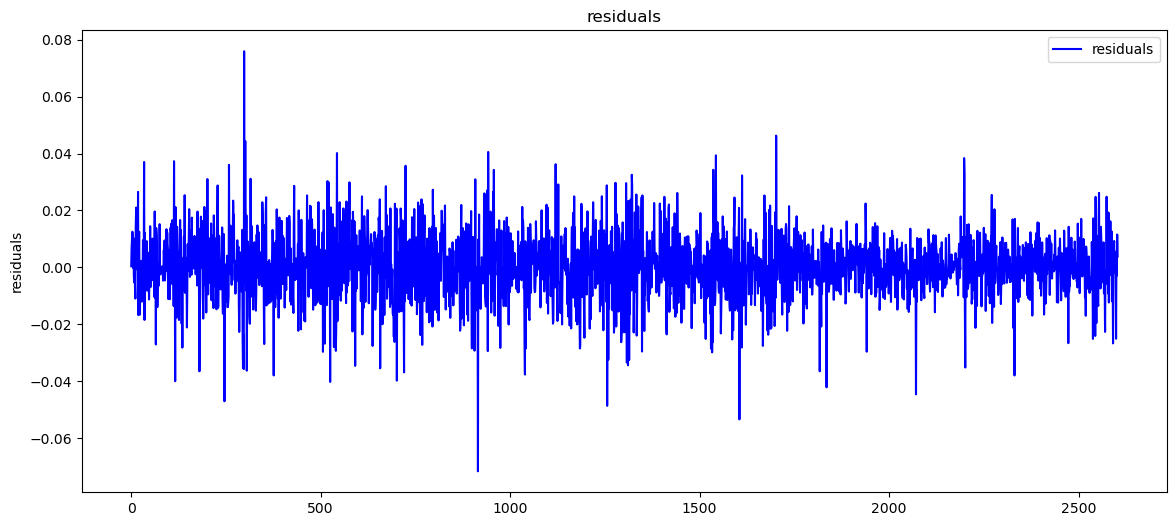

In [27]:
#%% Residuals
residuals = model3.resid

plt.figure(figsize=(14, 6))
plt.plot(residuals, label='residuals', color='blue')

plt.title('residuals')
plt.ylabel('residuals')

plt.legend()

Ljung-Box test statistic: 3.6628199883321297
p-value: 0.9612786572660956
Series Correlation：False


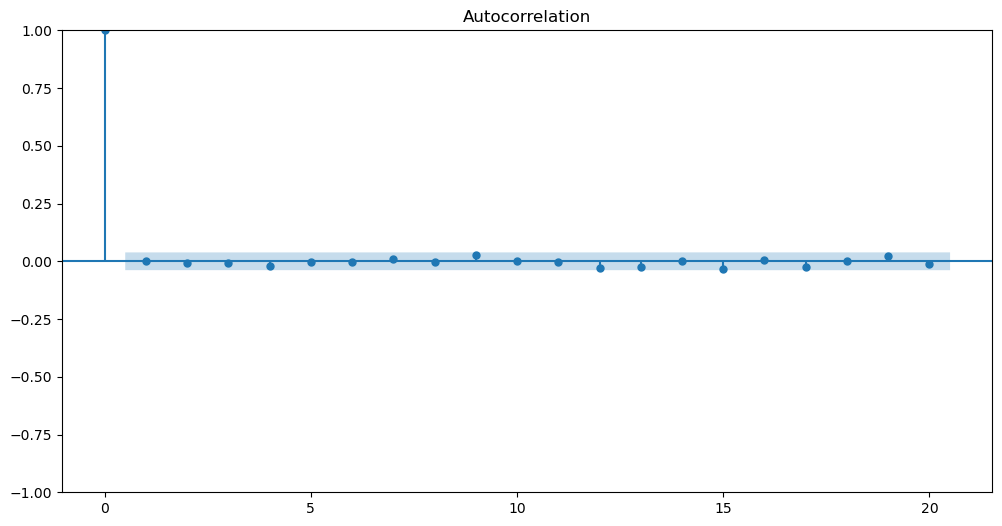

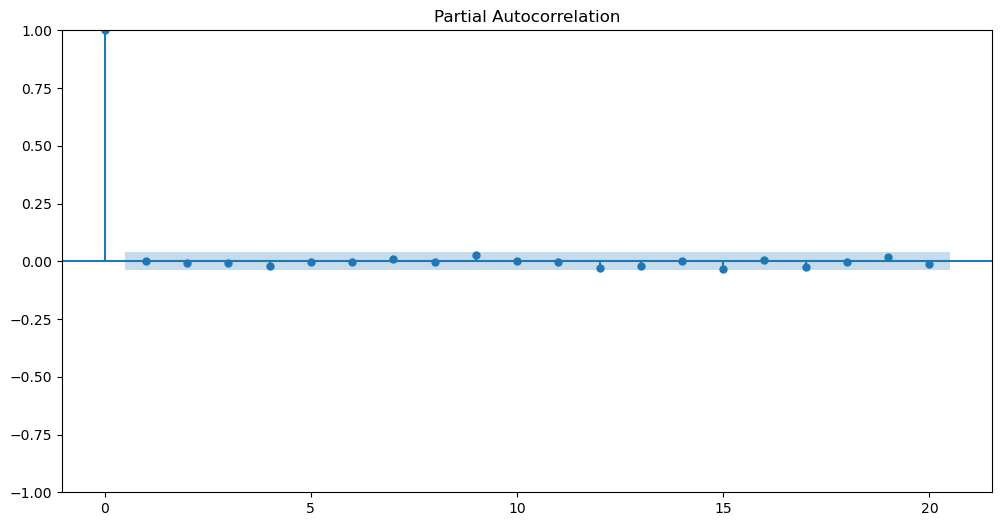

In [28]:
ts = residuals

ljunbox_results = sm.stats.diagnostic.acorr_ljungbox(ts, lags=[10])
print('Ljung-Box test statistic:', ljunbox_results['lb_stat'][ljunbox_results.index[0]])
print('p-value:', ljunbox_results['lb_pvalue'][ljunbox_results.index[0]])
print('Series Correlation：{}'.format(ljunbox_results['lb_pvalue'][ljunbox_results.index[0]] < 0.05))
# ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=20, ax=ax)
plt.show()
#PACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(ts.values.squeeze(), lags=20, ax=ax, method = 'yw')
plt.show()

Ljung-Box test statistic: 206.79632268556537
p-value: 6.159583550772802e-39
Series Correlation：True


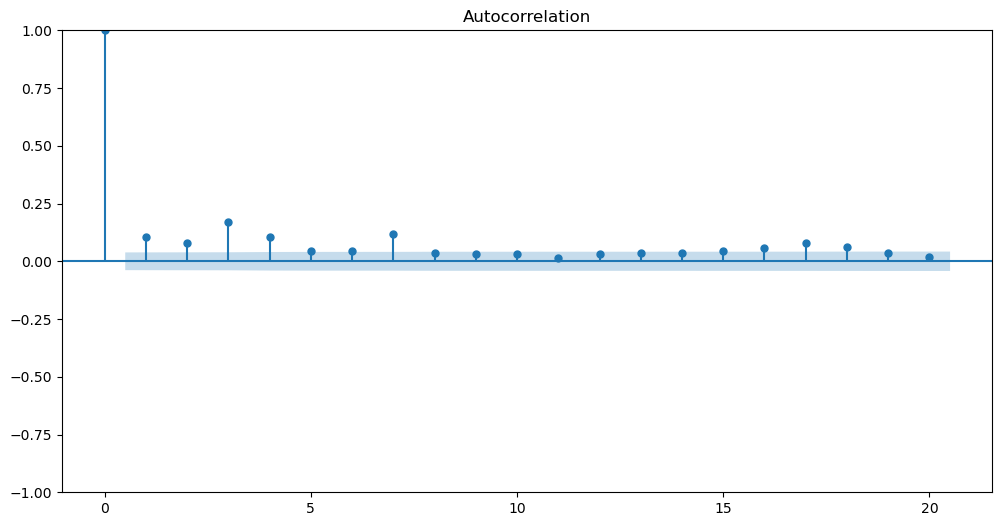

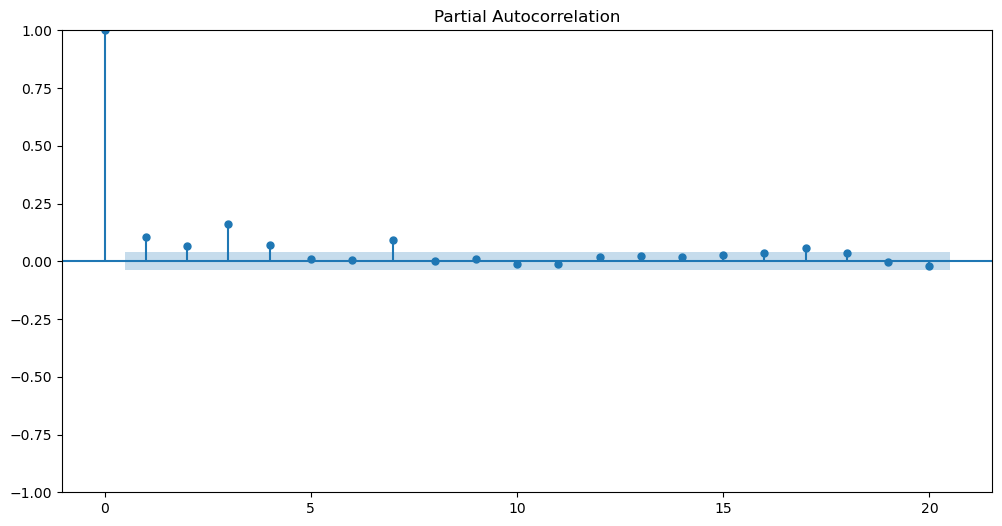

In [29]:
ts = residuals**2

ljunbox_results = sm.stats.diagnostic.acorr_ljungbox(ts, lags=[10])
print('Ljung-Box test statistic:', ljunbox_results['lb_stat'][ljunbox_results.index[0]])
print('p-value:', ljunbox_results['lb_pvalue'][ljunbox_results.index[0]])
print('Series Correlation：{}'.format(ljunbox_results['lb_pvalue'][ljunbox_results.index[0]] < 0.05))

# ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=20, ax=ax)
plt.show()
#PACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(ts.values.squeeze(), lags=20, ax=ax, method = 'yw')
plt.show()


### (e) Identify at least two plausible models for the conditional variance function of rt. Select a preferred model, estimate it, and report the estimated model in a standard format.

#### We compare four candidate models: ARMA(1, 1)-ARCH(1), ARMA(1, 1) - ARCH(2), ARMA(1, 1)-GARCH(1, 1) and ARMA(1, 1)-GARCH(1, 2) Taking AIC/BIC, significance of model coefficients  into consideration, we choose ARMA(1, 1)-GARCH(1, 1).

#### The estimated model ARMA(1,1)-GARCH(1，1) can be represented as follows:

\begin{align*}
r_{t}& = 0.000745 -0.401028 r_{t-1} + 0.481692 \epsilon_{t-1} + \epsilon_{t} \\
\epsilon_{t} &= \nu_{t}\sqrt{h_{t}}\\
h_{t}& = 0.000005 + 0.097544 \epsilon_{t_1} + 0.864113 h_{t-1}
\end{align*}

In [30]:
rugarch = importr('rugarch')

r_y = robjects.FloatVector(CWB_prices['RET'])

# ARMA(1,1)-GARCH(1，1)
variance_model = ListVector({'model': "sGARCH", 'garchOrder': robjects.IntVector([1, 1])})
mean_model = ListVector({'armaOrder': robjects.IntVector([1, 1]), 'include_mean': True})

spec = rugarch.ugarchspec(variance_model=variance_model, mean_model=mean_model, distribution_model="norm")

# fit model
fit = rugarch.ugarchfit(spec, r_y)

print(fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000745    0.000210   3.5431 0.000395
ar1    -0.401028    0.200565  -1.9995 0.045555
ma1     0.481692    0.191841   2.5109 0.012043
omega   0.000005    0.000001   7.0395 0.000000
alpha1  0.097544    0.008003  12.1886 0.000000
beta1   0.864113    0.010132  85.2848 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000745    0.000210   3.5406 0.000399
ar1    -0.401028    0.200559  -1.9996 0.045549
ma1     0.481692    0.190841   2.5240 0.011601
omega   0.000005    0.000002   3.2948 0.000985
alpha1  0.097544    0.010444   9.3400 0.000000
beta1   0.864113    0.013894  62.1925 0.000000

LogLike